<a href="https://colab.research.google.com/github/JeffersonEspinalA/Prueba/blob/main/Semana_5_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import datasets
import matplotlib.pyplot as plt
import random

In [ ]:
(x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()

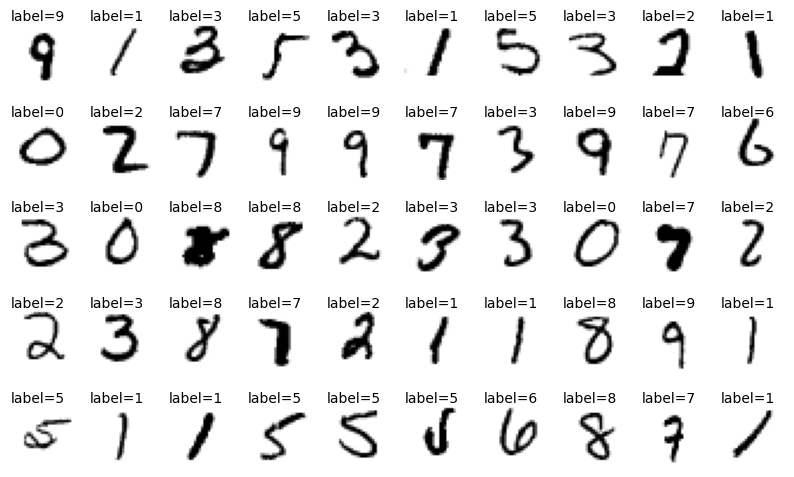

In [ ]:
fig, axs = plt.subplots(5, 10, figsize=(10,6))
m = x_train.shape[0]
for i in range(5):
    for j in range(10):
        idx = random.randint(0,m)
        axs[i,j].imshow(x_train[idx], cmap="gray_r")
        axs[i,j].axis("off")
        axs[i,j].text(0,0, f"label={y_train[idx]}")
        
plt.show()        

In [ ]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

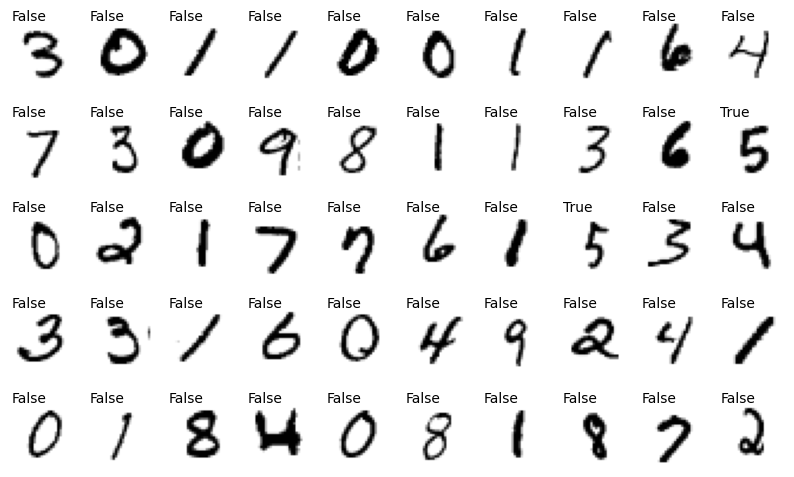

In [ ]:
fig, axs = plt.subplots(5, 10, figsize=(10,6))
m = x_train.shape[0]
for i in range(5):
    for j in range(10):
        idx = random.randint(0,m)
        axs[i,j].imshow(x_train[idx], cmap="gray_r")
        axs[i,j].axis("off")
        axs[i,j].text(0,0, f"{y_train_5[idx]}")
        
plt.show()  

In [ ]:
x_train = x_train.reshape((60000,28*28))
x_test = x_test.reshape((10000,28*28))

In [ ]:
from sklearn.linear_model import SGDClassifier

In [ ]:
model = SGDClassifier(random_state = 42)
model.fit(x_train, y_train_5)

SGDClassifier(random_state=42)

# Cross Validation

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
acc_train = cross_val_score(model, x_train, y_train_5, cv=3, scoring="accuracy")
acc_train

array([0.95035, 0.96035, 0.9604 ])

In [ ]:
acc_test = cross_val_score(model, x_test, y_test_5, cv=3, scoring="accuracy")
acc_test

array([0.95110978, 0.95439544, 0.96879688])

# Confusion Matrix

In [ ]:
from sklearn.model_selection import cross_val_predict

In [ ]:
y_hat = cross_val_predict(model, x_train, y_train_5, cv=3)

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
cm = confusion_matrix(y_train_5, y_hat)
cm

array([[53892,   687],
       [ 1891,  3530]], dtype=int64)

In [ ]:
y_hat = cross_val_predict(model, x_test, y_test_5, cv=3)
cm = confusion_matrix(y_test_5, y_hat)
cm

array([[8936,  172],
       [ 247,  645]], dtype=int64)

# Precision, Recall, F1 Score

Precision = TP / (TP + TP)

Recall = TP / (FN + TP)


In [ ]:
precision = cm[1,1] / (cm[0,1]+cm[1,1])
precision

0.7894736842105263

In [ ]:
cm[1,1] / (cm[1,0] + cm[1,1])

0.7230941704035875

In [ ]:
from sklearn.metrics import precision_recall_curve

In [ ]:
y_scores = cross_val_predict(model, x_test, y_test_5, cv=3,
                            method="decision_function")

In [ ]:
precisions, recalls, thresholds = precision_recall_curve(y_test_5, y_scores)

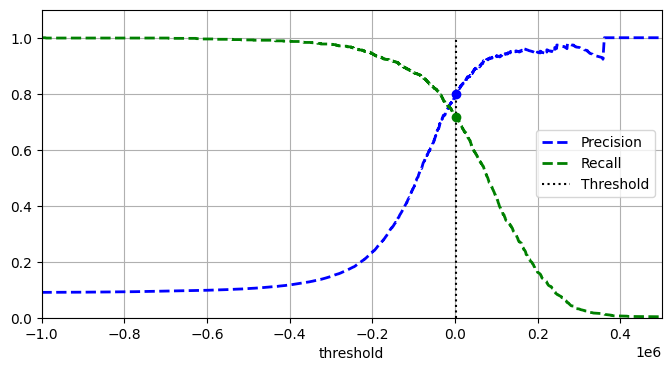

In [ ]:
plt.figure(figsize=(8,4))
plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
plt.plot(thresholds, recalls[:-1], "g--", label="Recall", linewidth=2)
plt.vlines(3000, 0, 1.0, "k", "dotted", label = "Threshold")

idx = (thresholds >= 3000).argmax()
plt.plot(thresholds[idx], precisions[idx], "bo")
plt.plot(thresholds[idx], recalls[idx], "go")
plt.axis([-1000000, 500000, 0, 1.1])
plt.grid()
plt.xlabel("threshold")
plt.legend(loc="center right")

plt.show()